<h1>Batik Nusantara image classification using MobileNetV2</h1>
<p>Author: HendryHB</p>

<h3>MobileNetV2</h3>
<p style="text-indent: 25px;">MobileNet is a class of efficient deep learning models developed by Google Inc. for mobile and embedded vision applications. The first version of MobileNet, introduced in 2017, was designed to achieve high performance while maintaining a low computational footprint, making it suitable for deployment on devices with limited resources. MobileNet utilizes depthwise separable convolutions, a technique that significantly reduces the number of parameters and computational cost compared to traditional convolutional neural networks (CNNs).[1]</p>
<p style="text-indent: 25px;">Following the success of MobileNet, Google introduced MobileNetV2 in 2018, which further improved upon the original architecture. MobileNetV2 incorporates several enhancements, such as inverted residuals and linear bottlenecks, to achieve better performance and efficiency. These improvements make MobileNetV2 even more suitable for real-time applications on mobile devices, pushing the boundaries of what can be achieved in resource-constrained environments. Pretrained MobileNet models, available for both versions, have been extensively utilized in various applications, ranging from image classification and object detection to segmentation and beyond. These models are often pre-trained on large datasets like ImageNet, enabling quick deployment and fine-tuning for specific tasks with high accuracy.[2]</p>
<p style="text-indent: 25px;">With this background, pretrained MobileNet models represent a significant advancement in the field of mobile and embedded vision, providing a balance between computational efficiency and robust performance.</p>

<strong>MobileNet Conceptual</strong><br>
<p style="text-indent: 25px;">MobileNet is based on a streamlined architecture that utilizes depthwise separable convolutions to reduce the computational cost and model size. This makes it highly suitable for deployment on devices with limited resources.</p>

<strong>MobileNet Components</strong><br>
The key components of the MobileNet model include:
<ol>
    <li>Depthwise Separable Convolutions: A key innovation in MobileNet, splitting the convolution into two layers—depthwise and pointwise.</li>
    <ul>
        <li>Depthwise Convolution: Applies a single filter per input channel.</li>
        <li>Pointwise Convolution: Uses a 1x1 convolution to combine the output of the depthwise convolution.</li>
    </ul>
    <li>Width Multiplier <code>(α)</code>: Controls the number of channels in each layer, trading off between model size and accuracy.</li>
    <li>Resolution Multiplier <code>(ρ)</code>: Adjusts the input image resolution, allowing further trade-offs between latency and accuracy.</li>
</ol>
<strong>Architecture</strong><br>
<img src="https://github.com/hendryhb/kecakbali/blob/main/mobilenetv2/1.png?raw=true"><br>
<strong>Bibliography</strong><br>
[1] A. G. Howard et al., “MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications,” 2017, arXiv. doi: 10.48550/ARXIV.1704.04861.<br>
[2] M. Sandler, A. Howard, M. Zhu, A. Zhmoginov, and L.-C. Chen, “MobileNetV2: Inverted Residuals and Linear Bottlenecks,” Mar. 21, 2019, arXiv: arXiv:1801.04381. doi: 10.48550/arXiv.1801.04381.
</p>

In [5]:
from google.colab import drive
import zipfile
import sys
import h5py
import numpy as np
import os
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, Model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,  Activation, GlobalAveragePooling2D

from keras.utils import to_categorical
from keras.models import load_model
from keras.preprocessing.image import array_to_img

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score

%matplotlib inline
import matplotlib.pyplot as plt
np.random.seed(42)

## Load Data

In [3]:
drive.mount('/content/drive')

In [4]:
with zipfile.ZipFile("/content/drive/MyDrive/cv_data/raw_batik_v2.1.zip") as zip_ref:
  zip_ref.extractall("./")

# Constants

In [8]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
BATCH_SIZE = 32

<h1>Pure Inference Using Pre-trained MobileNetV2</h1>
<p style="text-indent: 25px;"><strong>Inference</strong> is the process of making predictions or generating outputs based on new or unseen data by utilizing a pre-trained model as-is, without any additional training. In this case, MobileNetV2, which has been trained on large datasets like ImageNet, is used with its pre-trained weights.</p>

## Load the pretrained MobileNetV2 model and higher level layers

In [9]:
model = tf.keras.applications.mobilenet_v2.MobileNetV2(weights='imagenet', include_top=True)

<h2>Create a data generator for the inference data.</h2>
<p style="text-indent: 25px;">Since the dataset is divided into <code>training and testing</code> sets, let's use the train dataset. Alternatively, feel free to combine both folders into one and rename it as desired.</p>

In [18]:
# Data generator for inference
inference_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Assuming images for inference are in a directory "train" within DATA_DIR
inference_generator = inference_datagen.flow_from_directory(
    directory=os.path.join(DATA_DIR, "train"),
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb',
    class_mode=None,  # No labels for inference
    batch_size=BATCH_SIZE,
    shuffle=False  # Do not shuffle for inference
)

Found 640 images belonging to 20 classes.


# Predict on the inference data

In [4]:
predictions = model.predict(inference_generator, verbose=1)

<h2>Post-processing the Output</h2>
<p><code>decode_predictions</code> translates the model's raw output into human-readable class labels and probabilities</p>

In [20]:
decoded_predictions = decode_predictions(predictions, top=1)

# Print the predictions
for i, pred in enumerate(decoded_predictions):
    print(f"Image {i + 1}: {pred}")

Image 1: [('n03000247', 'chain_mail', 0.15763655)]
Image 2: [('n03485794', 'handkerchief', 0.3883182)]
Image 3: [('n03998194', 'prayer_rug', 0.7361719)]
Image 4: [('n03998194', 'prayer_rug', 0.93572474)]
Image 5: [('n03998194', 'prayer_rug', 0.24916555)]
Image 6: [('n04209239', 'shower_curtain', 0.3684207)]
Image 7: [('n03998194', 'prayer_rug', 0.07919145)]
Image 8: [('n03485794', 'handkerchief', 0.39850062)]
Image 9: [('n03998194', 'prayer_rug', 0.3569655)]
Image 10: [('n03998194', 'prayer_rug', 0.09079631)]
Image 11: [('n04209239', 'shower_curtain', 0.37523687)]
Image 12: [('n04525038', 'velvet', 0.106945105)]
Image 13: [('n03998194', 'prayer_rug', 0.21089545)]
Image 14: [('n03998194', 'prayer_rug', 0.9373022)]
Image 15: [('n04532106', 'vestment', 0.27653846)]
Image 16: [('n03998194', 'prayer_rug', 0.07197177)]
Image 17: [('n04136333', 'sarong', 0.7761927)]
Image 18: [('n04525038', 'velvet', 0.6015029)]
Image 19: [('n03998194', 'prayer_rug', 0.21185066)]
Image 20: [('n03998194', 'pra

<br><strong>Understanding the Output</strong><br>
<p style="text-indent: 25px;">The output from the <code>decode_predictions</code> function is based on the ImageNet dataset, which includes 1,000 different classes representing a wide variety of general image categories, such as everyday objects like cars, planes, bananas, basketballs, sarongs, and shower curtains. However, if using an inference pre-trained model with specific dataset like Batik Nusantara images and custom labels, <code>decode_predictions</code> will not work correctly because it relies on the ImageNet class indices and labels.</p>
<p style="text-indent: 25px;">To get meaningful predictions for specific classes like 'Bali_Barong' or 'Papua_Cendrawasih,' it is advisable to use a custom (pre-trained) model and layers trained on the Batik Nusantara dataset. This approach will enable the model to make predictions relevant to these specific classes.</p>

# Pretrained MobileNetV2 Model and custom layers

## Load Data - If this is done, skip this step

In [3]:
drive.mount('/content/drive')

In [4]:
with zipfile.ZipFile("/content/drive/MyDrive/cv_data/raw_batik_v2.1.zip") as zip_ref:
  zip_ref.extractall("./")

## Constants - If this is done, skip this step

In [6]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
BATCH_SIZE = 32

## Data gathering using DataGenerator

In [8]:
common_datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='constant',
    preprocessing_function=preprocess_input)

train_generator = common_datagen.flow_from_directory(
    directory=os.path.join(DATA_DIR, "train"),
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
    directory=os.path.join(DATA_DIR, "test"),
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb', # Set color mode to RGB
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 640 images belonging to 20 classes.
Found 160 images belonging to 20 classes.


<h2>Load MobileNetV2 model without top layer and Compile</h2>
<p>Please note that the modeling used here is simple, and further customization is encouraged.</p>

In [26]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, COLOR_CHANNELS))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)

# Create the full model
model_1 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

<h2>Train the Model</h2>
<p>Please note that the train strategy used here is simple, and further customization is encouraged.</p>
<p><strong>Uncomment below to run training process</strong></p>

In [1]:
# EPOCHS = 25

# model_1.fit(train_generator,
#                       batch_size=BATCH_SIZE, verbose=1,
#                       epochs=EPOCHS, 
#                       validation_data=test_generator)

<h2>Load Weights Data</h2> 
<p style="text-indent: 25px;">To expedite the process, the MobileNetV2 model has already been pre-trained, allowing to simply load the pre-trained weights instead of running the training again, which saves time. <strong>Skip this step and proceed to the evaluation and prediction after training the model</strong></p>

<h2>Load MobileNetV2 Model without top layer - If this is done, skip this step</h2>
<p>Please note that the modeling used here is simple, and further customization is encouraged.</p>

In [9]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, COLOR_CHANNELS))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)

# Create the full model
model_1 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Load pre-trained weights¶

In [ ]:
model_1.load_weights('/content/drive/MyDrive/mobilenetv2_batik_nusantara_weights.h5')

# Evaluation

In [11]:
test_loss, test_accuracy = model_1.evaluate(test_generator)
print(f"Test loss : {test_loss:0.3} and the test accuracy: {test_accuracy:0.2%}")

5/5 [==============================] - 31s 5s/step - loss: 0.2645 - accuracy: 0.9375
Test loss : 0.264 and the test accuracy: 93.75%


# Predict the classes

In [12]:
predictions = model_1.predict(test_generator)

5/5 [==============================] - 28s 5s/step


## Get class labels and Prediction class, labels and confidences

In [13]:
# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Get the true class indices
true_class_indices = test_generator.classes

# Get the predicted class indices
predicted_class_indices = np.argmax(predictions, axis=1)

# Map predicted class indices to the actual class labels
predicted_labels = [class_labels[idx] for idx in predicted_class_indices]

# Calculate the prediction confidence for each image
prediction_confidences = np.max(predictions, axis=1)

<h3>10 Lowest Predicted Images</h3> 
<p style="text-indent: 25px;">Displaying the lowest 10 predictions is more insightful than the highest predictions when using loaded pre-trained weights. However, if the model is trained from scratch, examining the highest predictions would also be valuable.</p>

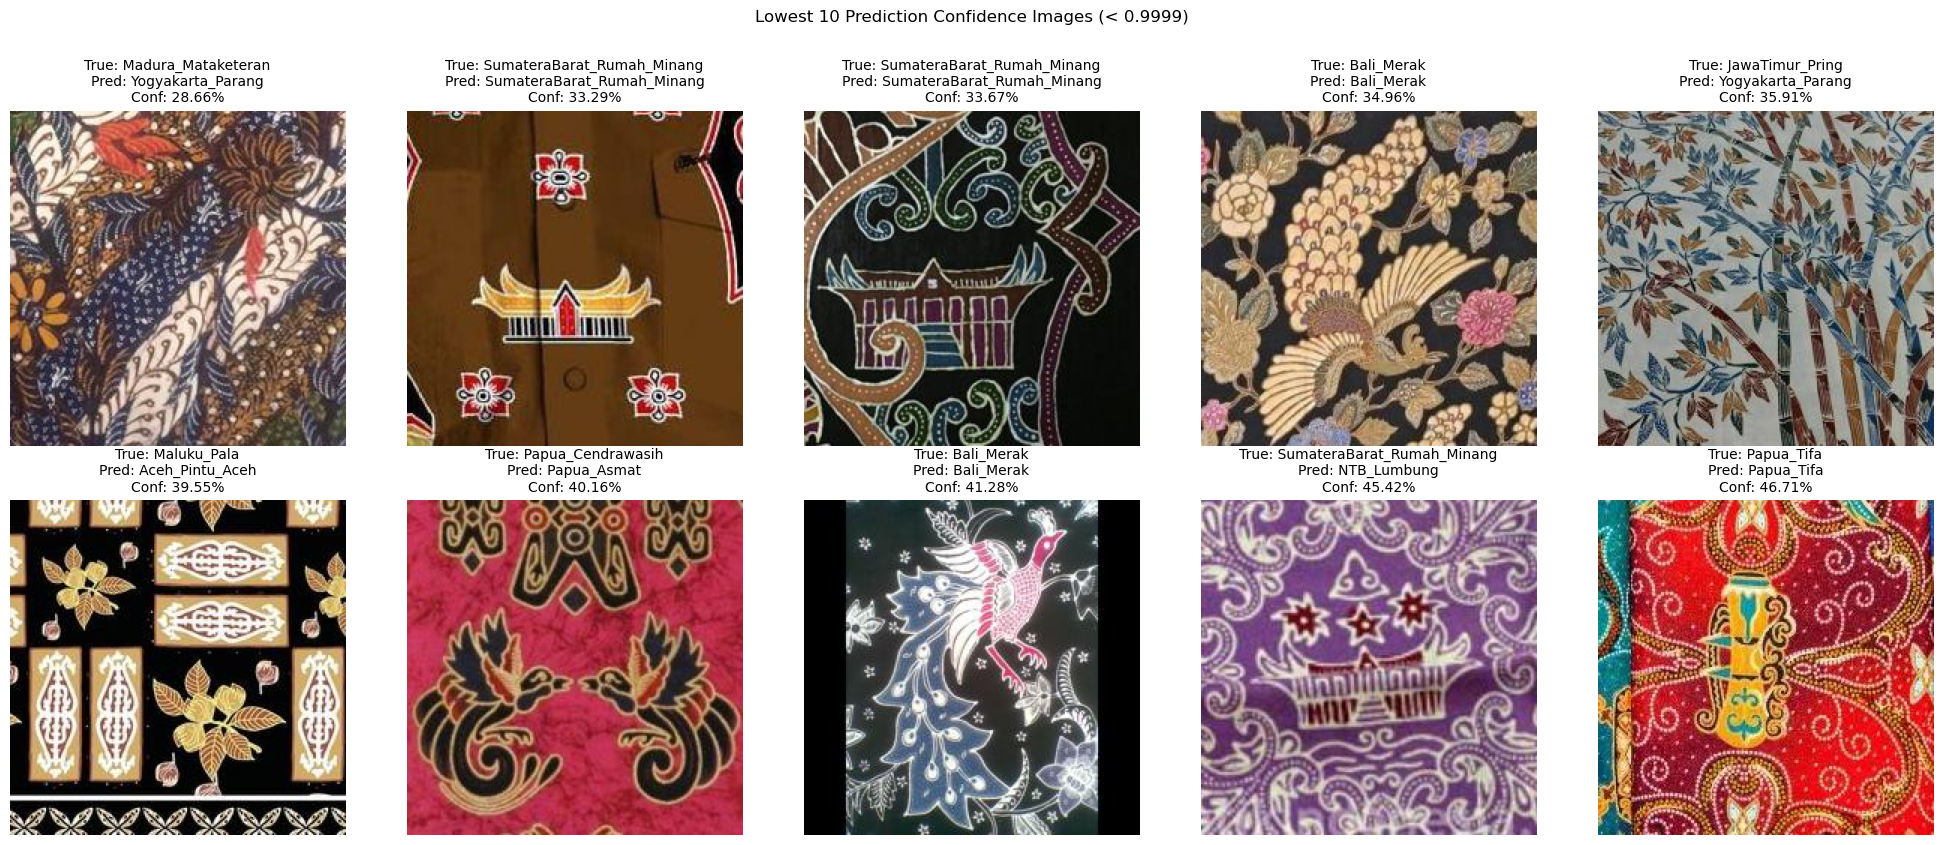

In [18]:
low_conf_indices = np.where(prediction_confidences < 0.9999)[0]
lowest_10_indices = np.argsort(prediction_confidences[low_conf_indices])[:10]

# Define the number of images to plot per row
images_per_row = 5

# Create a subplot grid to plot the images
fig, axes = plt.subplots(2, images_per_row, figsize=(20, 8)) 

for i, idx in enumerate(low_conf_indices[lowest_10_indices]):
    img_path = test_generator.filepaths[idx]
    true_label = class_labels[true_class_indices[idx]]
    predicted_label = predicted_labels[idx]
    confidence = prediction_confidences[idx] * 100
    
    img = plt.imread(img_path)
    ax = axes[i // images_per_row, i % images_per_row]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"True: {true_label}\nPred: {predicted_label}\nConf: {confidence:.2f}%", fontsize=10)

plt.tight_layout()
plt.suptitle('Lowest 10 Prediction Confidence Images (< 0.9999)', y=1.05)
plt.show()

# Confusion Matrix and Classification Report

<h3>Calculate <code>y_true</code> and <code>y_pred</code></h3>
<p><code>y_true</code>, retrieves the true class labels of the test images, while <code>y_pred</code> determines the predicted class labels by selecting the class with the highest probability for each image. y_pred will be an array containing the predicted class indices for each image in the test set.</p>

In [15]:
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)

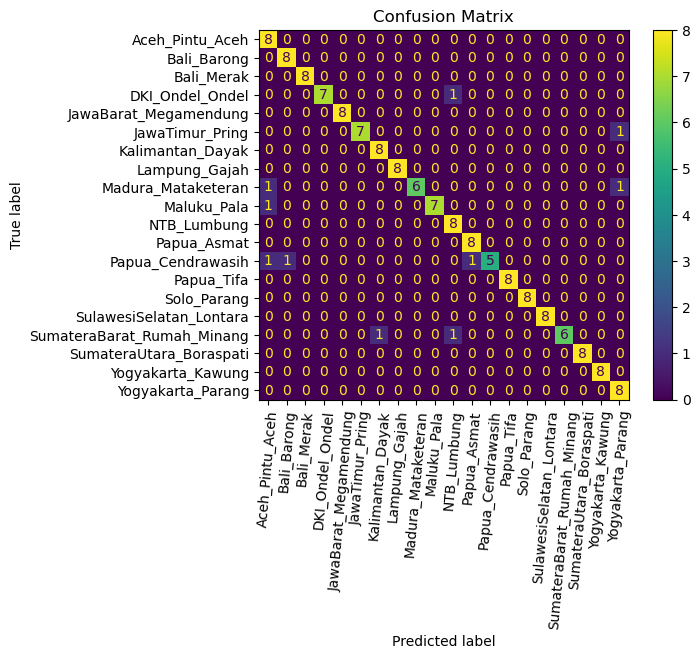

In [26]:
# Confusion Matrix Display
conf_matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)

disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.xticks(rotation=85)
plt.show()

In [17]:
class_report = classification_report(y_true, y_pred, target_names=class_labels)
print('Classification Report')
print(class_report)

Classification Report
                            precision    recall  f1-score   support

           Aceh_Pintu_Aceh       0.73      1.00      0.84         8
               Bali_Barong       0.89      1.00      0.94         8
                Bali_Merak       1.00      1.00      1.00         8
           DKI_Ondel_Ondel       1.00      0.88      0.93         8
     JawaBarat_Megamendung       1.00      1.00      1.00         8
           JawaTimur_Pring       1.00      0.88      0.93         8
          Kalimantan_Dayak       0.89      1.00      0.94         8
             Lampung_Gajah       1.00      1.00      1.00         8
        Madura_Mataketeran       1.00      0.75      0.86         8
               Maluku_Pala       1.00      0.88      0.93         8
               NTB_Lumbung       0.80      1.00      0.89         8
               Papua_Asmat       0.89      1.00      0.94         8
         Papua_Cendrawasih       1.00      0.62      0.77         8
                Papua_Tif

<h1>Summary and Conclusion</h1>
<p style="text-indent: 25px;">The MobileNetV2 model correctly classified 93.75% of the test samples while test loss 0.264 indicates the average error made by the model on the test set. It's important to note that the evaluation was conducted using weights loaded from previous training (which implies the MobileNetV2 model has already been fine-tuned during its prior training sessions).</p>
<p style="text-indent: 25px;">The model's confidence levels vary significantly, with lower confidence predictions (e.g., predicted Batik Yogyakarta Parang at 28.66%, as seen among the 10 lowest image predictions) indicating less certainty and a higher risk of misclassification. In the confusion matrix, diagonal elements often show correct classifications (e.g., an 8 means all samples of that class were correctly classified); however, some classes exhibit misclassifications. The classification report reveals that most classes have high precision, recall, and F1-scores, but a few classes, such as Papua_Cendrawasih and Madura_Mataketeran, have lower recall and F1-scores, indicating some misclassifications. Overall, the model's high evaluation metrics from the loaded weights suggest acceptable transfer learning and adaptation, but attention should be given to classes with lower confidence and misclassifications for further optimization.</p>
<strong>Potential Adjustments</strong><br>
<p style="text-indent: 25px;">To further improve MobileNetV2 model's performance, particularly for classes with lower confidence or recall, consider the following adjustments:</p>
<ol>
    <li>Increase Data Augmentation: Utilize a more aggressive dataset strategy and augmentation as outlined in the data card instructions to achieve deeper and more comprehensive performance, mitigating potential overfitting and ensuring the model performs well on unseen data.</li>
    <li>Conduct additional evaluations using cross-validation or a more varied test set to confirm the model's robustness and generalizability.</li>
    <li>Model Tuning: Experiment with model's architecture fine-tuning, hyperparameters, and training strategies.</li>
</ol>
<p style="text-indent: 25px;">By implementing these recommendations, MobileNetV2’s performance can be enhanced, potentially approaching or even surpassing other model's architecture in some scenarios.</p>
<p style="text-indent: 25px;">Pretrained MobileNet offers a highly efficient and flexible solution for various vision tasks, especially suitable for mobile and embedded devices. Its architecture, based on depthwise separable convolutions, allows it to maintain a balance between performance and computational requirements. While it provides significant advantages in terms of efficiency and flexibility, there are trade-offs to consider, particularly in applications where accuracy is paramount. Despite this, MobileNet's versatility and efficiency make it a valuable tool in the field of machine learning and computer vision.</p>

#### -------End of Kernel------------

<h4><em>Should you find this kernel helpful, an upvote (&#x25B2;) would be greatly appreciated.</em></h3>